In [196]:
# Import necessary libraries for data manipulation and machine learning
import numpy as np                 # For numerical operations on arrays and matrices
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For creating static visualizations
import seaborn as sns              # For statistical data visualization based on matplotlib

# Import modules for model evaluation and selection
from sklearn.model_selection import train_test_split, cross_val_score    # For splitting data and cross-validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    # For model evaluation metrics

from sklearn.linear_model import Lasso

# Import additional libraries for hyperparameter tuning
import optuna    # For hyperparameter optimization

# Import metrics for additional model evaluation
from sklearn import metrics
# Import category_encoders for encoding categorical features
import category_encoders as ce

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [197]:
# Define the path to the CSV file containing the data
path = r'C:\Users\User\Desktop\Rashad\DATA\housetrain.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(path)

# Display the DataFrame to view the loaded data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [198]:
lr_data = data.copy()

In [199]:
# Remove the 'Country' and 'Year' columns from the lr_data DataFrame
lr_data = lr_data.drop(columns=['Id'])

In [200]:
lr_data.isnull().sum().sum()

7829

In [201]:
# Iterate over each column in lr_data
for column in lr_data.columns:
    # Fill missing values in each column with the mean of that column
    if lr_data[column].dtype == 'int64' or lr_data[column].dtype == 'float64':
        lr_data[column].fillna(lr_data[column].mean(), inplace=True)
    # Fill missing values in object columns with the mode of that column
    elif lr_data[column].dtype == 'object':
        mode_value = lr_data[column].mode()[0]  # Get the mode value
        lr_data[column].fillna(mode_value, inplace=True)

In [202]:
# Check for missing values again
lr_data.isnull().sum().sum()

0

In [203]:
# Check for duplicated rows in lr_data and sum the number of duplicated rows
lr_data.duplicated().sum()

0

In [204]:
# Filter out non-numeric columns
numeric_columns = lr_data.select_dtypes(include=['float64', 'int64'])

# Now perform your calculations on numeric_columns
iqr = numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)
lower = numeric_columns.quantile(0.25) - 1.5 * iqr
upper = numeric_columns.quantile(0.75) + 1.5 * iqr

In [205]:
for column in lr_data.select_dtypes(include=['float64', 'int64']).columns:
    # Replace outliers with upper bound value
    lr_data[column] = np.where(lr_data[column] > upper[column], upper[column], lr_data[column])
    # Replace outliers with lower bound value
    lr_data[column] = np.where(lr_data[column] < lower[column], lower[column], lr_data[column])

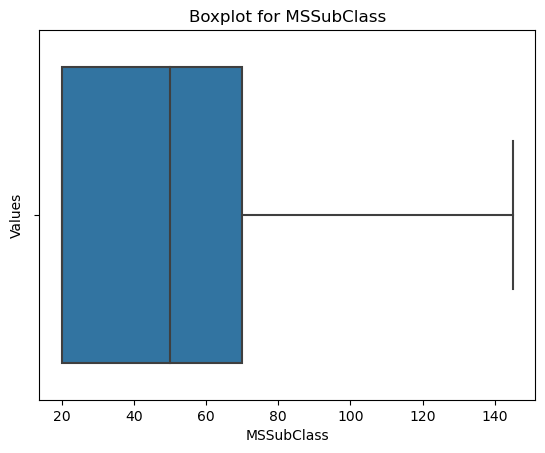

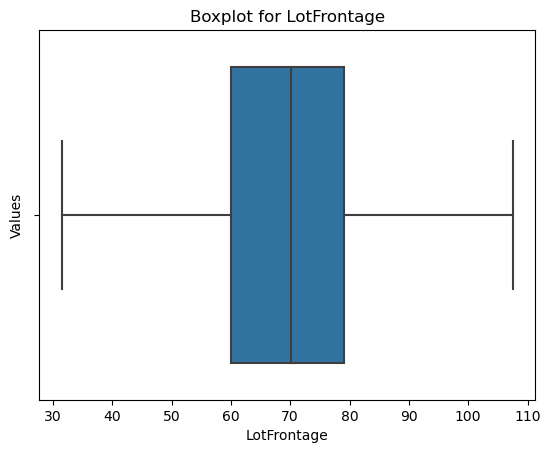

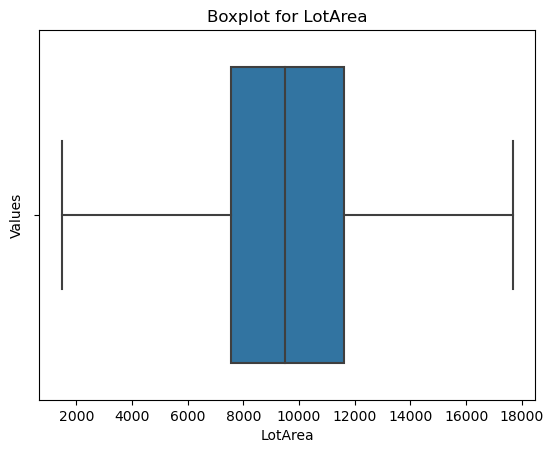

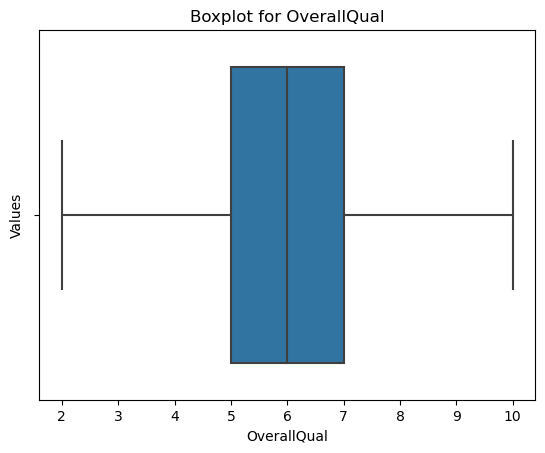

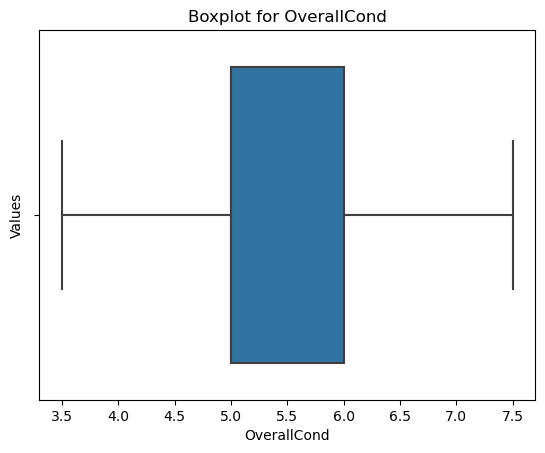

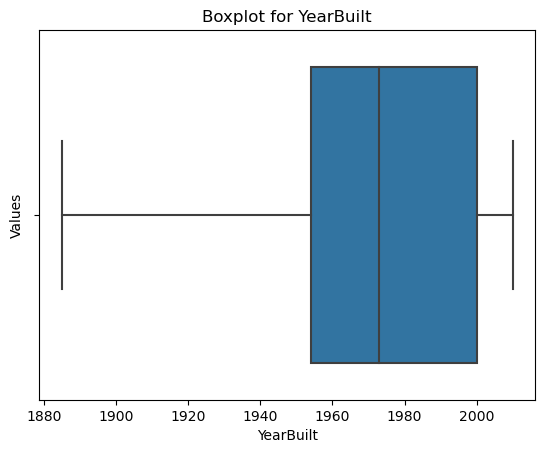

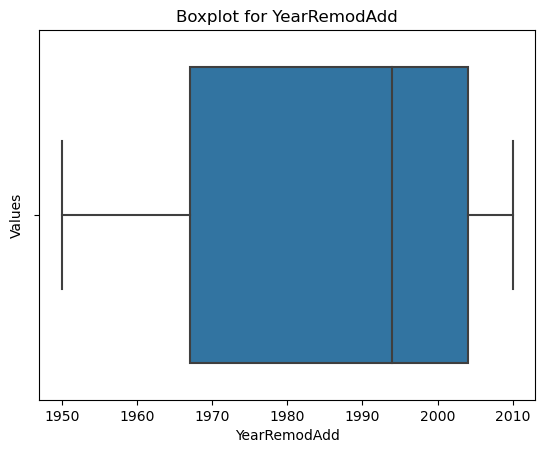

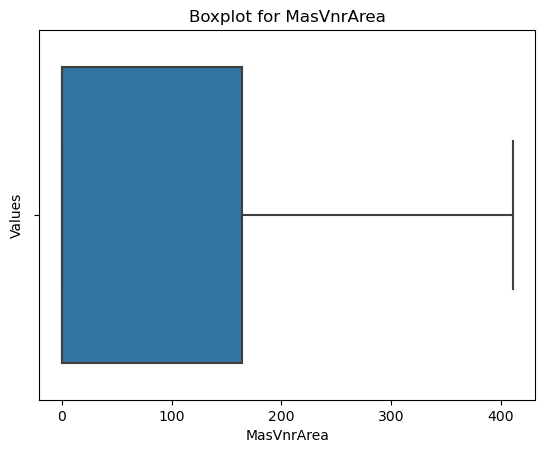

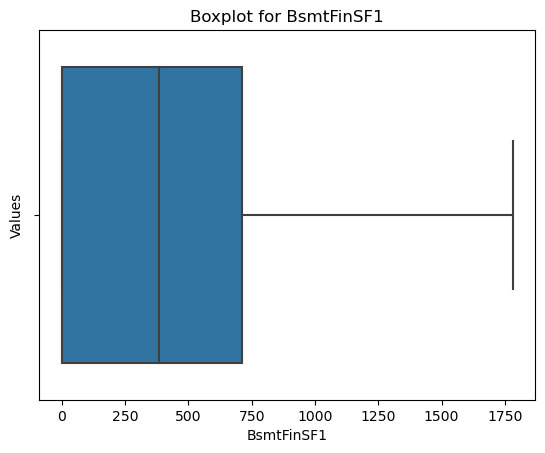

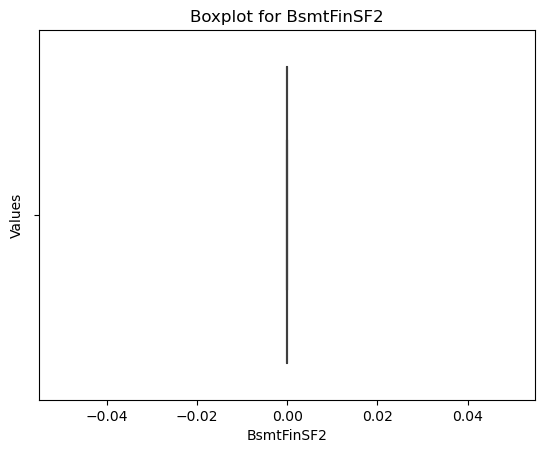

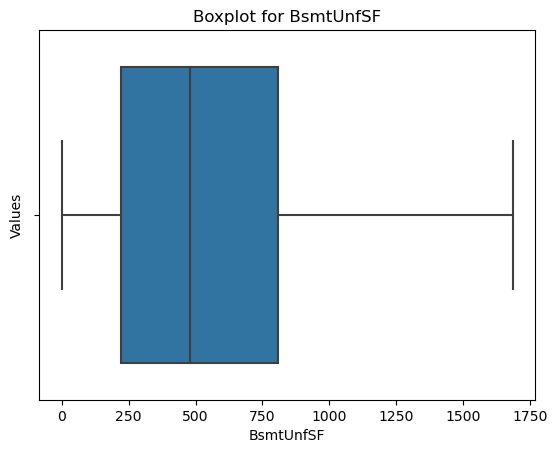

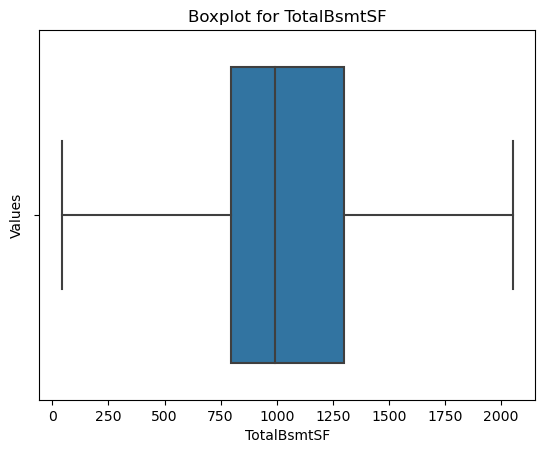

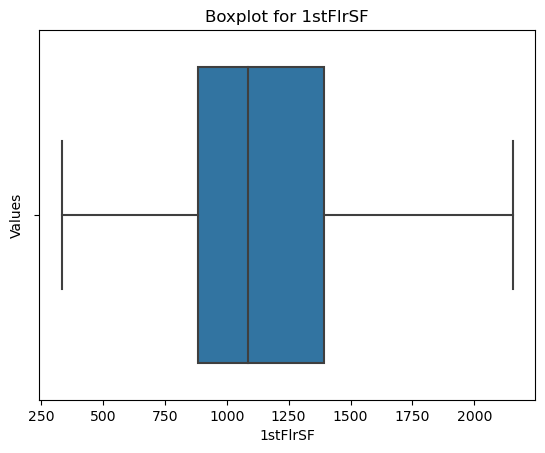

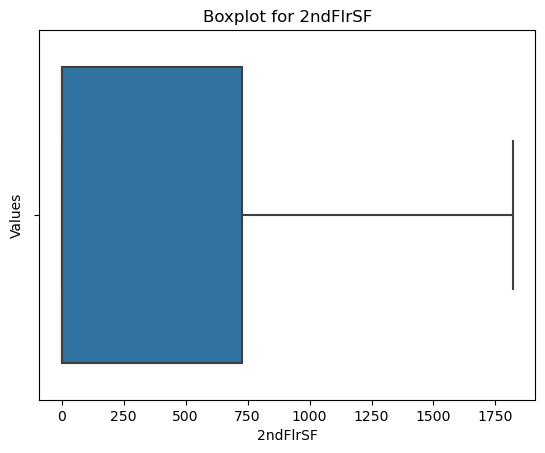

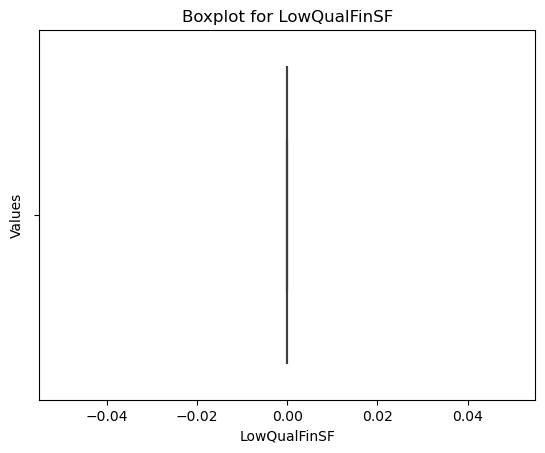

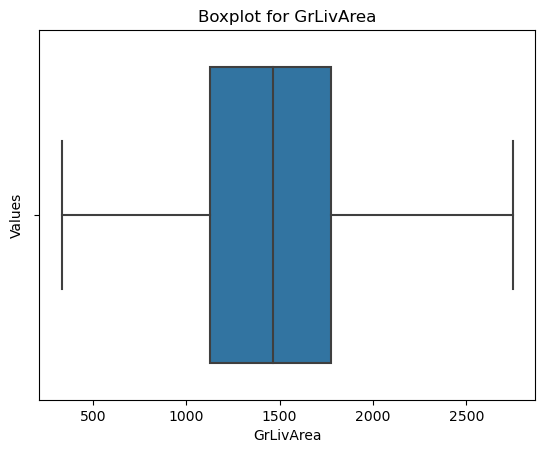

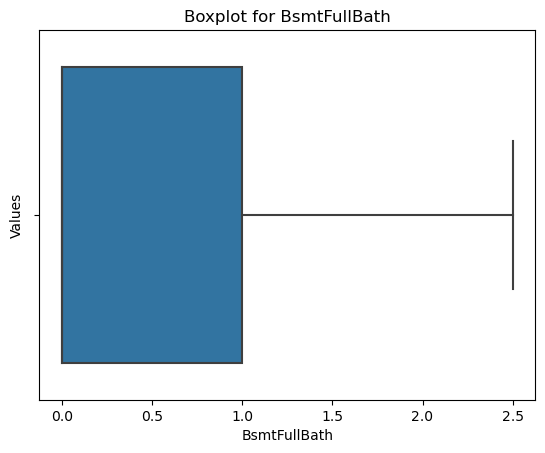

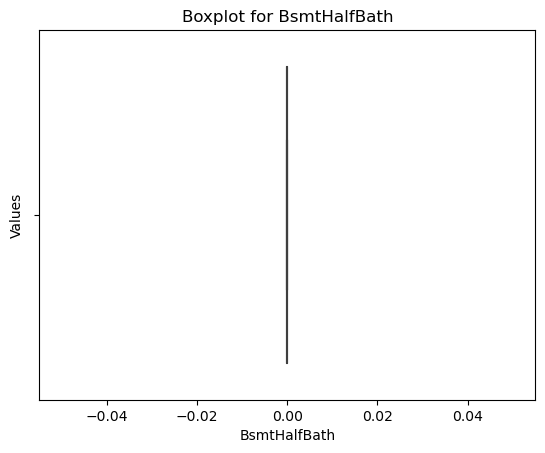

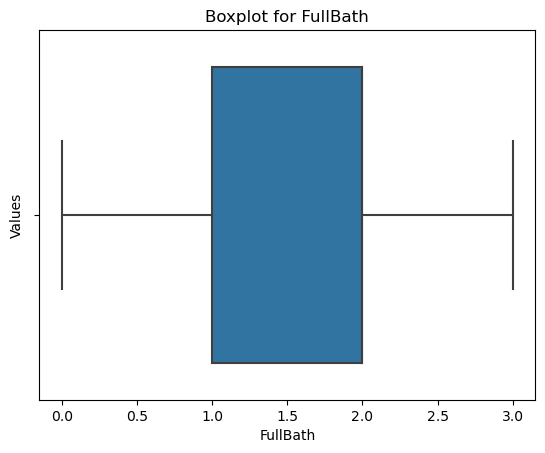

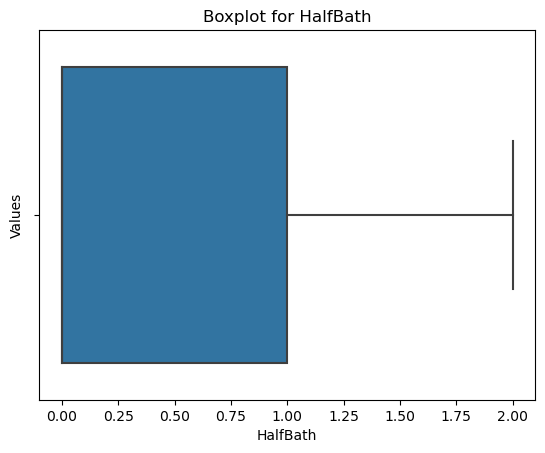

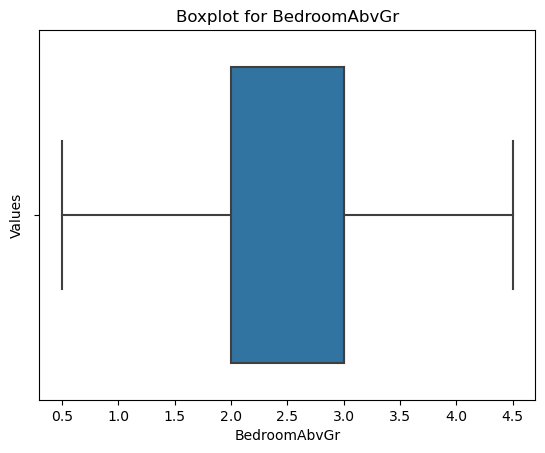

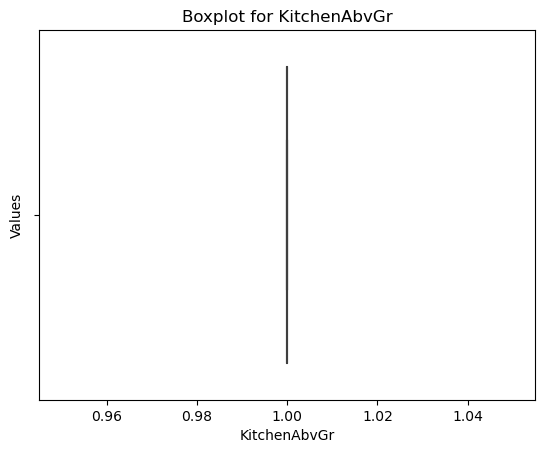

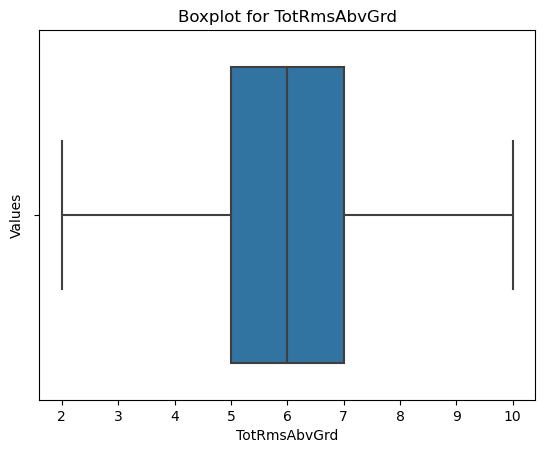

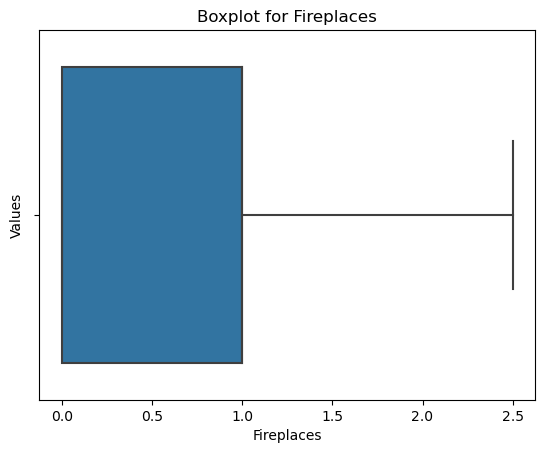

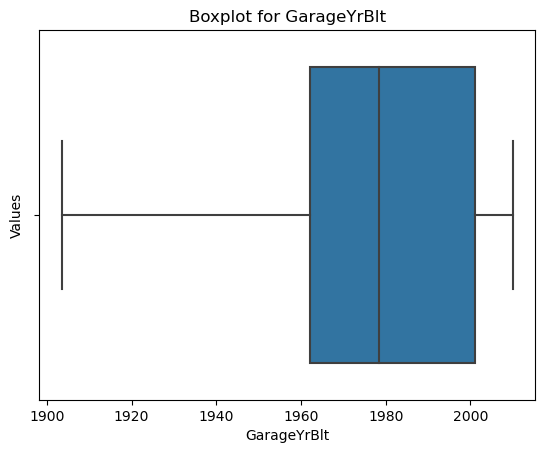

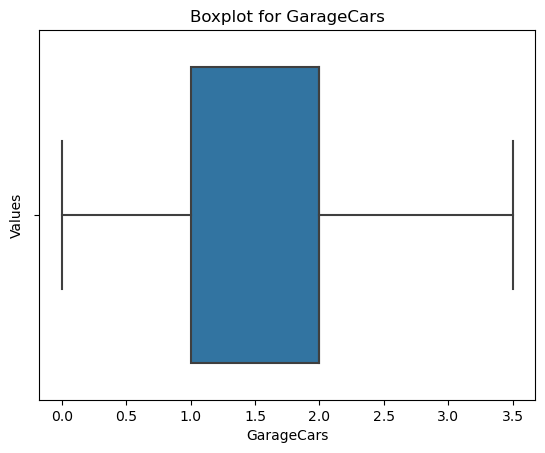

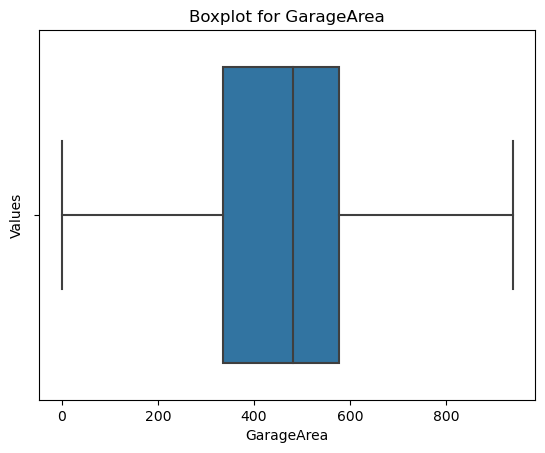

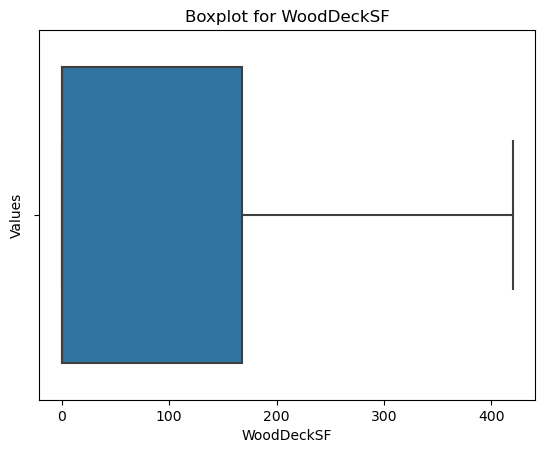

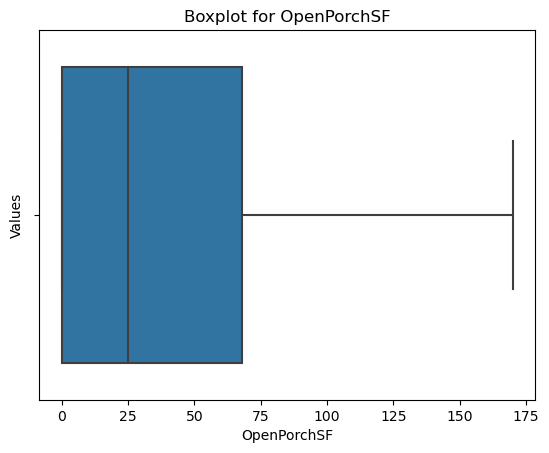

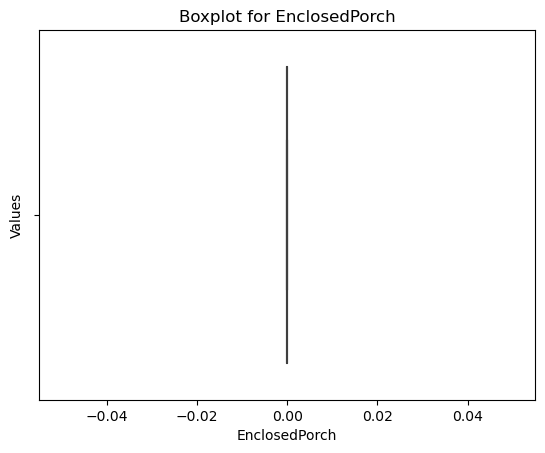

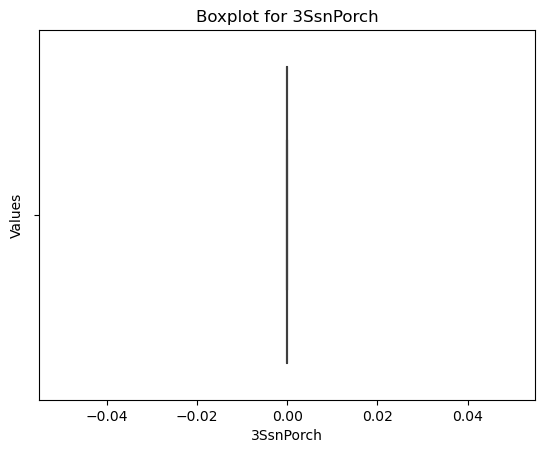

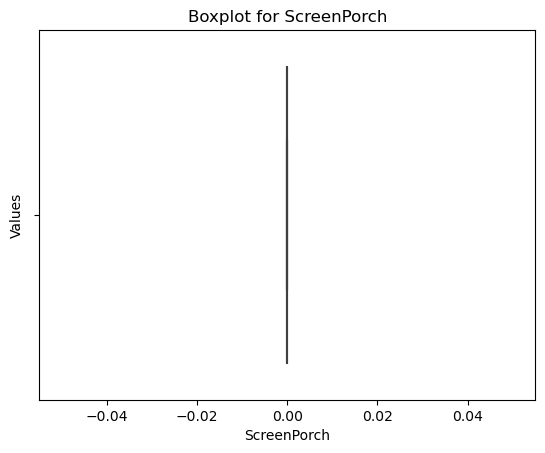

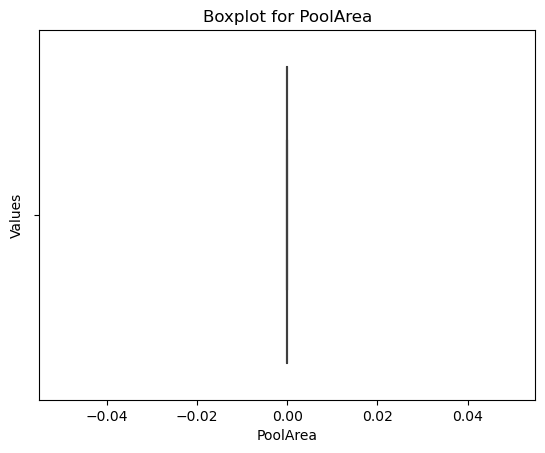

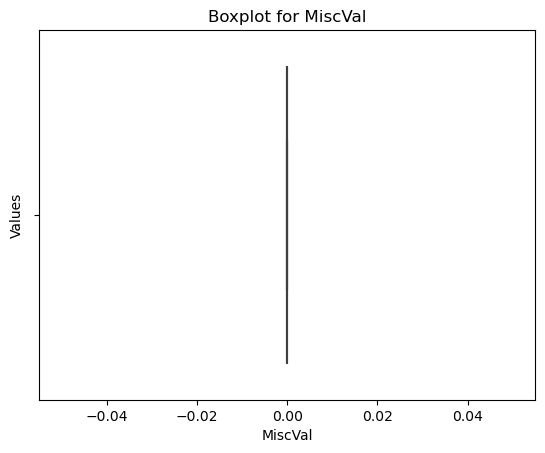

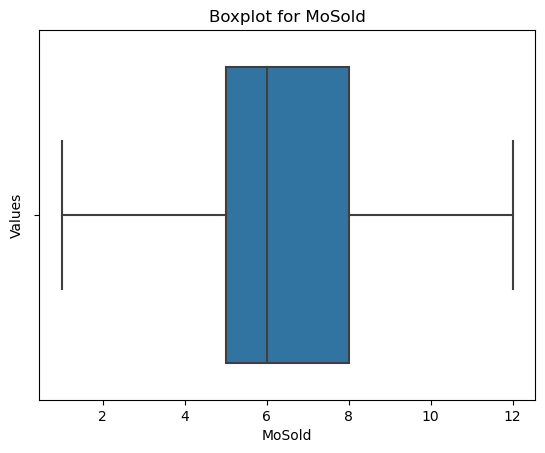

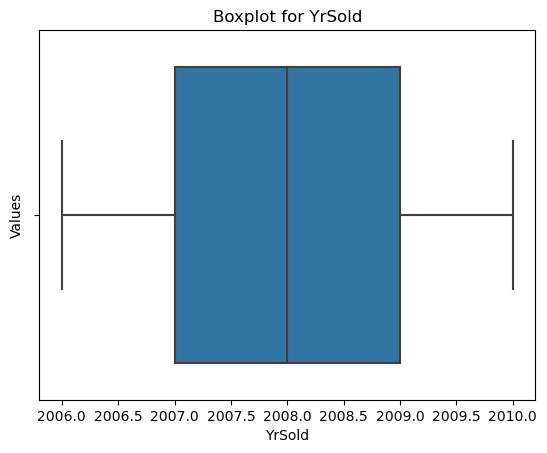

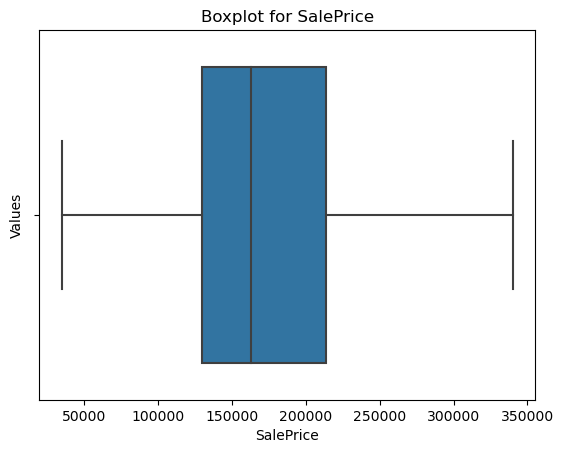

In [206]:
# Visualize boxplots for numerical columns
for column in lr_data.select_dtypes(include=['float64', 'int64']).columns:
    if column == 'Status':
        continue
    else:
        sns.boxplot(x=lr_data[column], data=lr_data)
        plt.title(f"Boxplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Values")
        plt.show()

In [210]:
# Initialize a OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns using OneHotEncoder
one_hot_encoded = one_hot_encoder.fit_transform(lr_data[categorical_columns.columns])

# Convert the encoded array into a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns.columns))

# Drop the original categorical columns from the lr_data DataFrame
lr_data.drop(columns=categorical_columns.columns, inplace=True)

# Concatenate the one-hot encoded DataFrame with the lr_data DataFrame
lr_data_encoded = pd.concat([lr_data, one_hot_encoded_df], axis=1)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [211]:
# Define the target variable (Y) and predictor variables (X)
Y = lr_data_encoded['SalePrice']
X = lr_data_encoded.drop(columns=['SalePrice'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Lasso model
lasso_model = Lasso(alpha=1.0, random_state=42)  # You can adjust the alpha parameter for regularization

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = lasso_model.predict(X_test)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


In [212]:
y_pred

array([158665.34069221, 321196.82508824,  93260.29973847, 179318.14743673,
       304116.3583386 ,  71462.41577258, 239993.96566926, 144367.35720847,
        61220.31027398, 145146.07091556, 144166.30950432, 109446.70206045,
        95732.72936855, 217290.85110675, 172072.30207404, 134819.30430592,
       193074.6391664 , 129678.2912275 , 126120.12397689, 217350.87711355,
       154262.86487333, 208783.82598023, 171925.82360796, 122932.36121147,
       202536.38274344, 150968.81205142, 193028.2605553 , 109262.11936813,
       178087.57886572, 202522.35618084, 149799.23066048, 269261.78393783,
       230724.46253652, 111680.44702296, 250052.69460232, 154036.93757752,
       137792.18388495, 203245.26751578, 308665.89041476, 110450.17820195,
       134394.75769153, 224007.95947976, 105705.9405433 , 312854.53780918,
       133900.9456382 , 142008.81694322, 101735.67701598, 134046.48151657,
       371673.98896923, 129174.61347292, 116498.79620104, 218454.53129241,
       112415.80351728, 2

In [215]:
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict labels on the training data
    y_train_pred = model.predict(X_train)

    # Predict labels on the testing data
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print model performance metrics
    print(f'Model Performance for {model_name}')
    print('Training Data:')
    print('Mean Absolute Error:', train_mae)
    print('Mean Squared Error:', train_mse)
    print('R-squared:', train_r2)
    print('Testing Data:')
    print('Mean Absolute Error:', test_mae)
    print('Mean Squared Error:', test_mse)
    print('R-squared:', test_r2)

    return train_r2, test_r2


In [216]:
# Initialize the DataFrame
r2_df = pd.DataFrame(columns=['Model', 'Train R2', 'Test R2'])


train_r2, test_r2 = train_and_evaluate_model('Lasso', lasso_model, X_train, y_train, X_test, y_test)
    
r2_df = pd.concat([r2_df, pd.DataFrame({'Model': ['Lasso'], 'Train R2': [train_r2], 'Test R2': [test_r2]})], ignore_index=True)

r2_df_sorted = r2_df.sort_values(by='Test R2', ascending=False)

r2_df_sorted

Model Performance for Lasso
Training Data:
Mean Absolute Error: 10819.294259989334
Mean Squared Error: 236515440.84267592
R-squared: 0.9464402719340397
Testing Data:
Mean Absolute Error: 15164.246486764596
Mean Squared Error: 479648925.5398592
R-squared: 0.9018972381067168


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


,Model,Train R2,Test R2
0,Lasso,0.94644,0.901897


In [217]:
# Define the path to the CSV file containing the deployment/test data
test_path = r'C:\Users\User\Desktop\Rashad\DATA\housetest.csv'

# Read the CSV file into a pandas DataFrame
test_data = pd.read_csv(test_path)

# Drop the 'Id' column from the test data (assuming it's similar to the training data)
test_data.drop(columns=['Id'], inplace=True)

# Iterate over each column in test_data
for column in test_data.columns:
    # Fill missing values in each column with the mean of that column
    if test_data[column].dtype == 'int64' or test_data[column].dtype == 'float64':
        test_data[column].fillna(test_data[column].mean(), inplace=True)
    # Fill missing values in object columns with the mode of that column
    elif test_data[column].dtype == 'object':
        mode_value = test_data[column].mode()[0]  # Get the mode value
        test_data[column].fillna(mode_value, inplace=True)

# Filter out non-numeric columns
test_numeric_columns = test_data.select_dtypes(include=['float64', 'int64'])

# Apply outlier treatment (if desired) to test_numeric_columns
for column in test_data.select_dtypes(include=['float64', 'int64']).columns:
    # Replace outliers with upper bound value
    test_data[column] = np.where(test_data[column] > upper[column], upper[column], test_data[column])
    # Replace outliers with lower bound value
    test_data[column] = np.where(test_data[column] < lower[column], lower[column], test_data[column])

# Separate categorical columns from the test data
test_categorical_columns = test_data.select_dtypes(include=['object'])

# Encode categorical columns using the same OneHotEncoder instance
test_one_hot_encoded = one_hot_encoder.transform(test_data[test_categorical_columns.columns])

# Convert the encoded array into a DataFrame
test_one_hot_encoded_df = pd.DataFrame(test_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(test_categorical_columns.columns))

# Drop the original categorical columns from the test data DataFrame
test_data.drop(columns=test_categorical_columns.columns, inplace=True)

# Concatenate the one-hot encoded DataFrame with the test data DataFrame
test_data_encoded = pd.concat([test_data, test_one_hot_encoded_df], axis=1)


In [218]:
# Extract the predictor variables (X_test_data_encoded) from the preprocessed test data
X_test_data_encoded = test_data_encoded

# Predict the target variable for the test data using the trained Lasso model
test_predictions = lasso_model.predict(X_test_data_encoded)


# Read the original test data CSV file to retrieve the 'Id' column
test_original = pd.read_csv(test_path)

# Extract the 'Id' column from the original test data
test_ids = test_original['Id']

# Create a DataFrame to store the predictions along with the 'Id' column
test_predictions_df = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})

# Optionally, you can save the predictions to a CSV file
test_predictions_df.to_csv(r'C:\Users\User\Desktop\Rashad\DATA\predicted_sale_prices.csv', index=False)
